Final Ast19 Project (yippie schools almost over)

For this project i'll be focusing on analyzing and visualizing astronomical data from the Hubble Ultra Deep Field (hudf). Using Python libraries like Astropy, sep, and matplotlib, the aim is to perform scientific calculations, identify celestial objects, and to create accurate visualizations oike 3d models or images. This has two parts that areeeeeeeeee

1. Using the SEP tutorial to analyze a sample fits image, which involves background subtraction, detecting objects, and creating a flux histogram
2. Applying the same analysis techniques to hudf images to generate a 3-color composite image, representing light captured at different wavelengths

Part 1: The Tutorial FITS Image

This part uses the SEP tutorial to show background subtraction, object detection, and visualization using a sample fits image:

1. Library Imports and Setup: libraries like numpy, sep, and astropy are imported to enable data processing and visualization
2. Load and Visualize Data: A sample FITS image (image.fits) is loaded and the raw data is displayed with adjusted brightness and contrast
3. Background Subtraction: The spatially varying background is computed and removed from the image. The background and its RMS noise are visualized as separate images
4. Object Detection: Using SEP, objects in the background-subtracted image are spotted. Ellipses enclose around the detected objects to highlight their locations and shapes
5. Flux Histogram: The flux or brightness of each detected object is calculated and visualized in the histogram, this shows the distribution of the source brightness values

Step 0: Adding the needed Libraries
Importing the libraries needed to execute the code.

In [66]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from astropy.visualization import make_lupton_rgb

Step 1: Function to Load FITS Data
Load the FITS file and make the data in native byte order
otherwise this function won't ensure compatibility with SEP and avoid errors due to a byte being out of order


In [ ]:
def load_fits(file_name):
    data = fits.getdata(file_name)
    if not data.dtype.isnative:
        data = data.byteswap(inplace=True).newbyteorder()
    return data

# Load tutorials fits file
fits_file = "image.fits"
data = load_fits(fits_file)

# Make the data is in native byte order
assert data.dtype.isnative, "Data is not in native byte order"

Step 2: Plot and Save the Original Image
Display the raw image data to visualize its initial state
The brightness and contrast are tweaked using the mean and standard deviation of pixel values.m, s = np.mean(data), np.std(data)

Displaying and saving the original image...


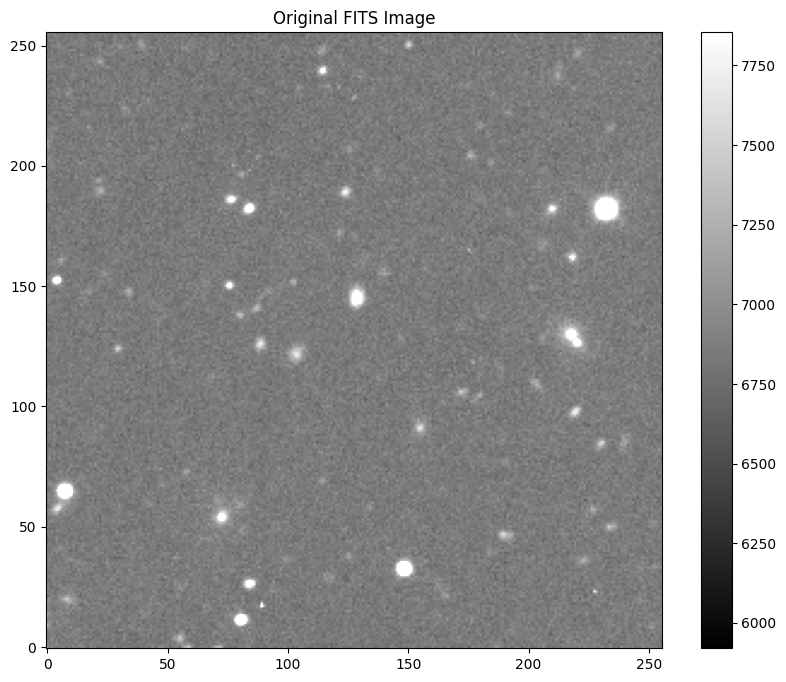

In [ ]:
# Step 2: Display and Save the original Image
print("Displaying and saving the original image...")
m, s = np.mean(data), np.std(data)  # Calculate mean and standard deviation for contrast adjustment
plt.imshow(data, cmap='gray', vmin=m-s, vmax=m+s, origin='lower')  # Same display range as in the notebook
plt.colorbar()
plt.title("Original FITS Image")

# Save the image with enhanced settings
plt.savefig("original_image.png", dpi=300, bbox_inches='tight')  # Save with high DPI and tight layout
plt.show()

Step 3: Performing Background Subtraction
Compute the spatially varying background and its RMS or (noise)
Step removes unwanted brightness variations due to the telescope or sky changing it

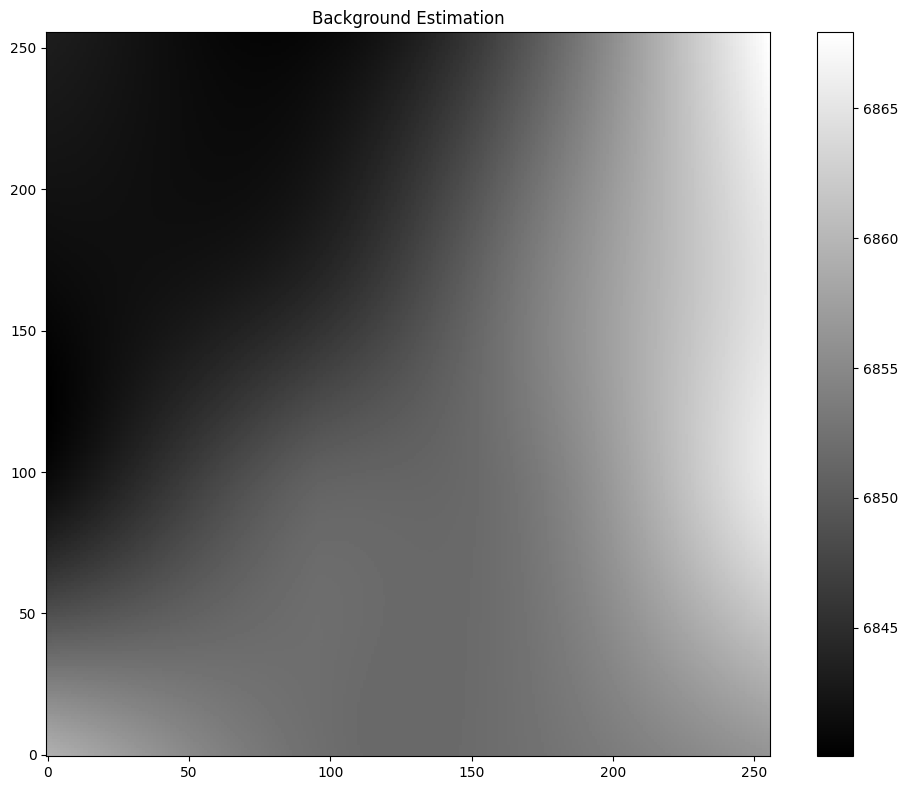

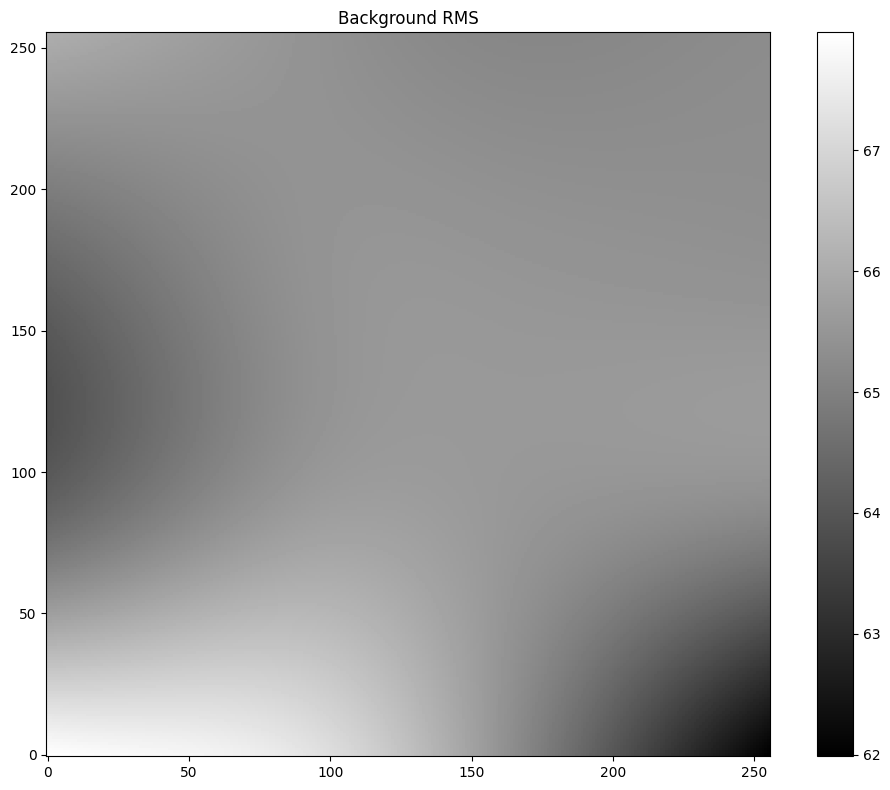

In [69]:
# Perform background subtraction
bkg = sep.Background(data)
bkg_image = bkg.back()  # Background model
bkg_rms = bkg.rms()  # RMS noise of the background

# Plot and Save the Background Image
plt.figure(figsize=(10, 8))  # Create a new figure
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background Estimation")
plt.tight_layout()  # Prevent clipping
plt.savefig("s1_background_image.png", dpi=300, bbox_inches='tight')  # Save image
plt.show()  # Display in notebook
plt.close()  # Close the figure

# Plot and Save the Background RMS Image
plt.figure(figsize=(10, 8))  # Create a new figure
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background RMS")
plt.tight_layout()  # Prevent clipping
plt.savefig("s1_background_rms_image.png", dpi=300, bbox_inches='tight')  # Save image
plt.show()  # Display in notebook
plt.close()  # Close the figure

Step 4: Subtract the Background and Detect Objects
Subtract the computed background model from the raw image to isolate celestial objects

In [70]:
data_sub = data - bkg

# Detect objects in the background-subtracted image.
# SEP identifies sources based on a detection threshold (1.5 times the global RMS here).
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

Step 5: Plot Detected Objects
Display the background-subtracted image with red ellipses highlighting detected objects

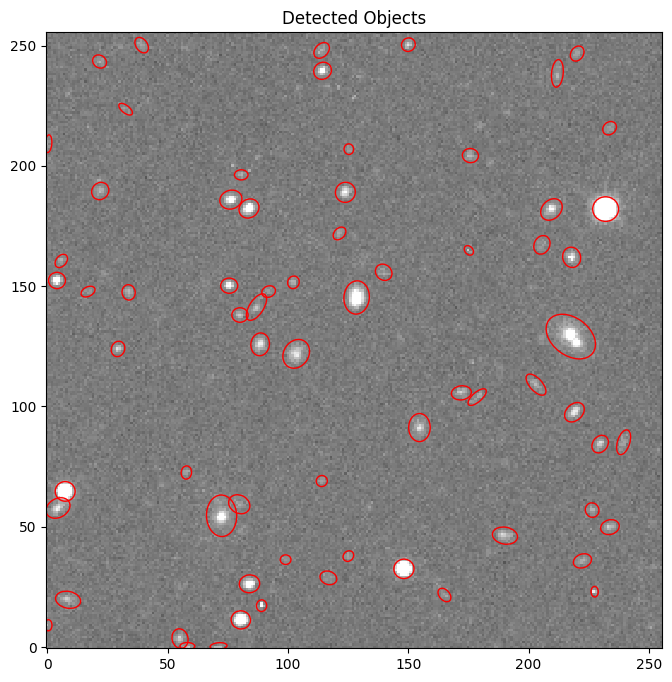

In [ ]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

# Highlight ellipses on the detected objects
for obj in objects:
    e = Ellipse(xy=(obj['x'], obj['y']),
                width=6*obj['a'],
                height=6*obj['b'],
                angle=obj['theta'] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.title("Detected Objects")
plt.show()  # Display the detected objects inline
plt.savefig("detected_objects.png")
plt.close()

Part 2: Analyzing HUDF Images

This part applies the same techniques to real HUDF data to extract deeper insights and create visualizations
1. Loading HUDF FITS Images: The f105w, f125w, and f160w band images are loaded along with each band capturing light at different wavelengths which provides a comprehensive look into the data
2. Background Subtraction and Object Detection: The background is removed and objects are detected in the f105w image. The detected objects are highlighted with ellipses
3. Flux Analysis: The histogram of flux values for detected objects is generated which details the brightness distribution of celestial sources
4. Creating a 3-Color Composite Image:
            - The f105w, f125w, and f160w bands are rescaled and normalized to enhance faint sources and 
            map the data to a [0, 1] range for visualization
            - A composite image is made by using three colors for its composition. With red being assigned to f160w, green to f125w, and blue to f105w. 
            This RGB composite shows how different wavelengths contribute to the field creating the image
            - The final composite image is displayed for all to see highlighting the structure and colors of the HUDF

Step 0: Add Libraries AGAIN.

In [72]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

Make sure the plots are displayed inline in Jupyter Notebook

In [73]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10., 8.]  # Set default figure size

Step 1: Load the FITS file
    
Load the f105w band image from a FITS file and make sure the data is in native byte order.
This image will serve as the primary dataset for background subtraction and object detection.

In [74]:
with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits") as hdul:
    f105w_data = hdul[0].data.byteswap().newbyteorder()

Step 2: Display the original image
Display the raw image data to visualize the initial state of the image
The brightness and contrast are tweak the brightness and contrast

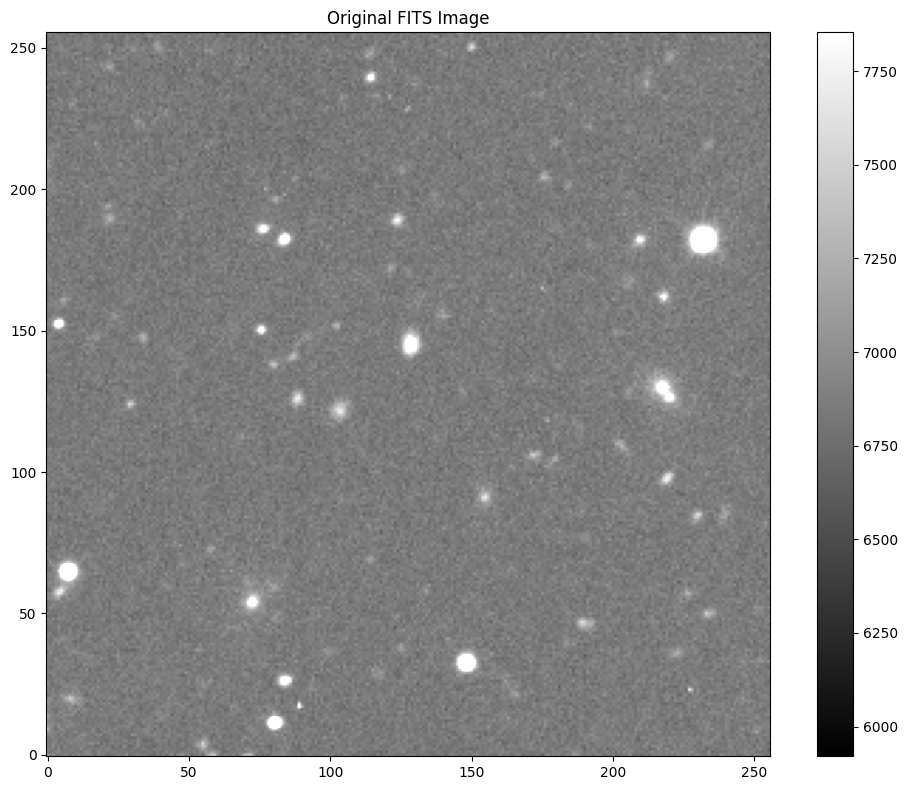

In [ ]:
m, s = np.mean(data), np.std(data)  # Calculate mean and standard deviation for contrast adjustment
plt.imshow(data, cmap='gray', vmin=m-s, vmax=m+s, origin='lower')  # the same display range as in the notebook
plt.colorbar()
plt.title("Original FITS Image")
plt.tight_layout()  # make sure of proper rendering
plt.savefig("original_image.png", dpi=300, bbox_inches='tight')  # Save with high DPI and tight layout
plt.show()

Step 3: Background subtraction
Compute the spatially varying background and background RMS (noise) using SEP which gets rid of variations in brightness because of factors such as the telescope or sky

In [ ]:
# Step 3: Background subtraction
bkg = sep.Background(f105w_data)  # Create a background model
bkg_image = bkg.back()  # Extract the 2D background model
bkg_rms = bkg.rms()  # Extract the RMS noise of the background

# Make sure dimensions match
assert f105w_data.shape == bkg_image.shape, "Dimension mismatch between data and background!"

# Subtract the background model from the original data
data_sub = f105w_data - bkg_image

Step 4: Display the background and noise
Visualize the background model and noise to make sure the the subtraction step is right

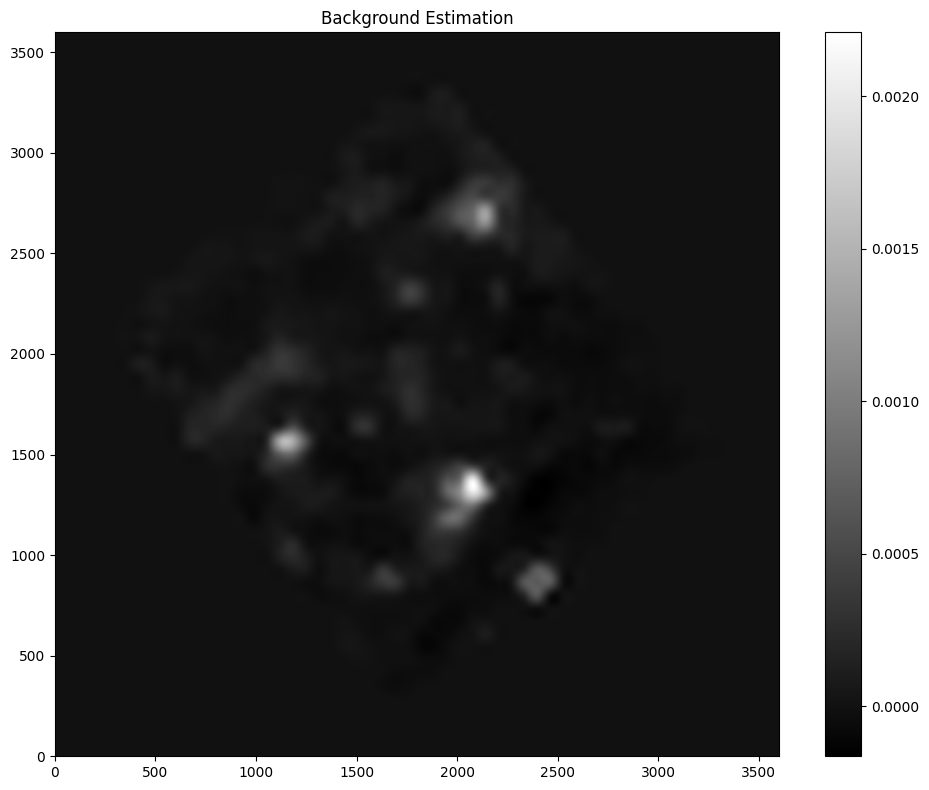

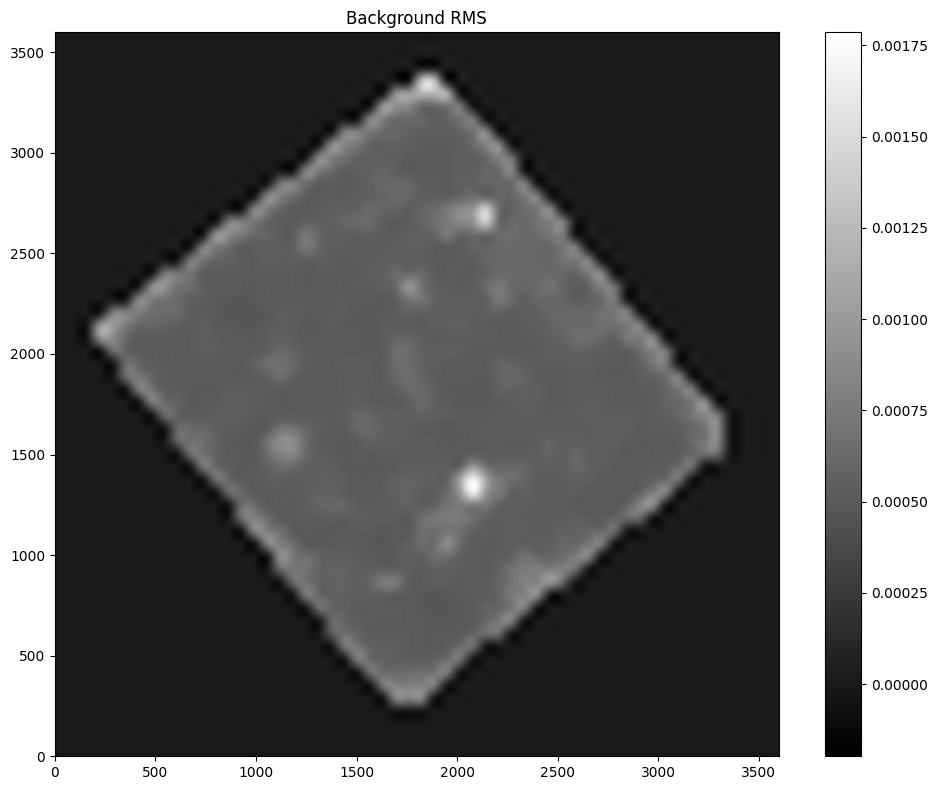

In [77]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background Estimation")
plt.tight_layout()
plt.savefig("background_image.png", dpi=300, bbox_inches='tight')
plt.show()

plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background RMS")
plt.tight_layout()
plt.savefig("background_rms_image.png", dpi=300, bbox_inches='tight')
plt.show()

Step 5: Subtract the background and detect objects
subtract the background model from the raw data to isolate celestial objects then
use the SEP `extract` function to identify and characterize these objects

In [78]:
data_sub = f105w_data - bkg
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

Step 6: Display detected objects
Plot the background subtracted image and the ellipses around highlighted objects
Every ellipse represents a shape and orientation of each detected source of celestial bodies

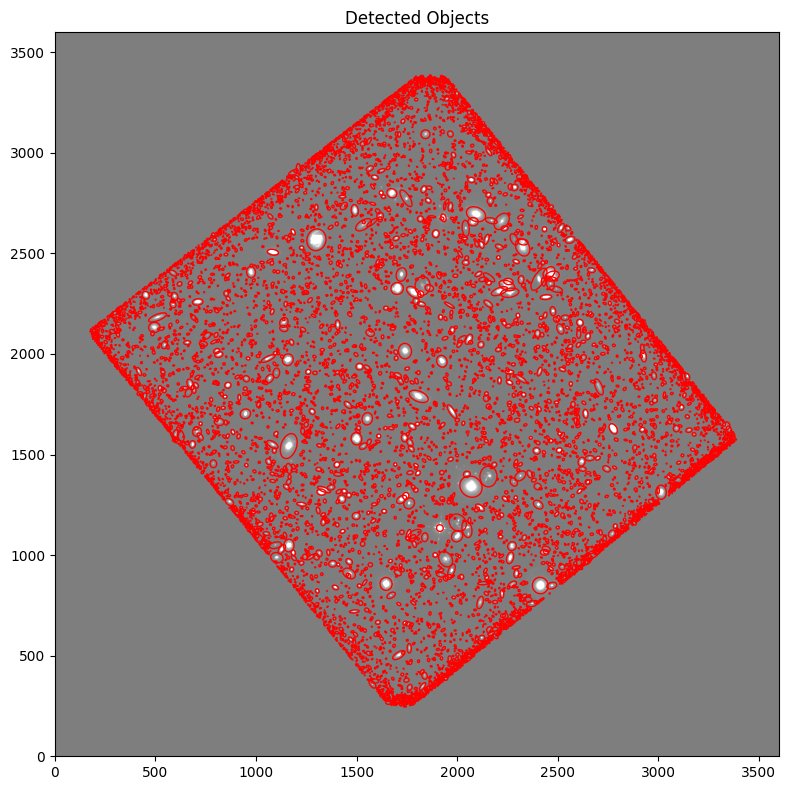

In [79]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

# Overlay ellipses on detected objects
for obj in objects:
    e = Ellipse(xy=(obj['x'], obj['y']),
                width=6*obj['a'],
                height=6*obj['b'],
                angle=obj['theta'] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.title("Detected Objects")
plt.tight_layout()
plt.savefig("detected_objects.png", dpi=300, bbox_inches='tight')
plt.show()

Step 7: Histogram of fluxes
Measure the flux (brightness) of each detected celestial object using circular aperture photometry
whcih then generates a histogram of flux values to analyze the distribution of source brightnesses

Number of objects detected: 8643
Sample flux values: [ 0.03128197  0.03101789 -0.02438809  0.00194706  0.01245725 -0.01122822
  0.02936754 -0.00912643  0.0480232   0.02783969]
Min flux: -1.061365427845663, Max flux: 807.2972835731507


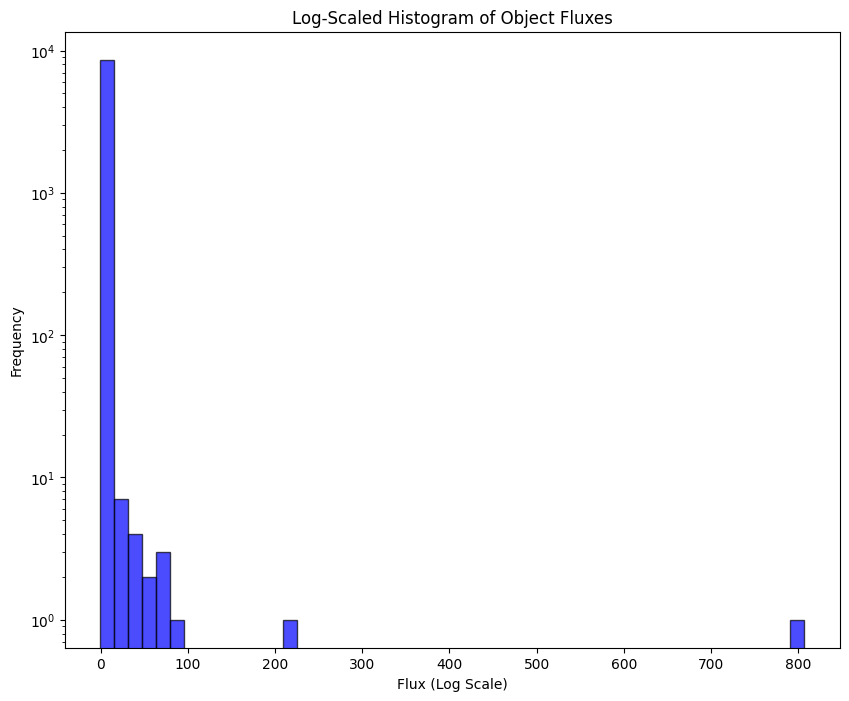

In [ ]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

# Display flux statistics
print(f"Number of objects detected: {len(objects)}")
print(f"Sample flux values: {flux[:10]}")
print(f"Min flux: {np.min(flux)}, Max flux: {np.max(flux)}")

# Axe invalid flux values (e.g., NaN or infinity) before plotting
flux = flux[np.isfinite(flux)]

# Logarithmic scale histogram
plt.hist(flux, bins=50, color='blue', edgecolor='black', alpha=0.7, log=True)
plt.title("Log-Scaled Histogram of Object Fluxes")
plt.xlabel("Flux (Log Scale)")
plt.ylabel("Frequency")
plt.savefig("HistogramOF.png")
plt.show()


Step 8: Load additional images for a 3-color composite
Load the f125w and f160w band images to create a 3-color composite along with f105w
then each band represents the light captured with different wavelengths

In [81]:
with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits") as hdul:
    f160w_data = hdul[0].data.byteswap().newbyteorder()
with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits") as hdul:
    f125w_data = hdul[0].data.byteswap().newbyteorder()

Rescale the data for visualization
tweak the brightness and contrast of the images to focus faint sources
and make the dynamic range suitable for visualization

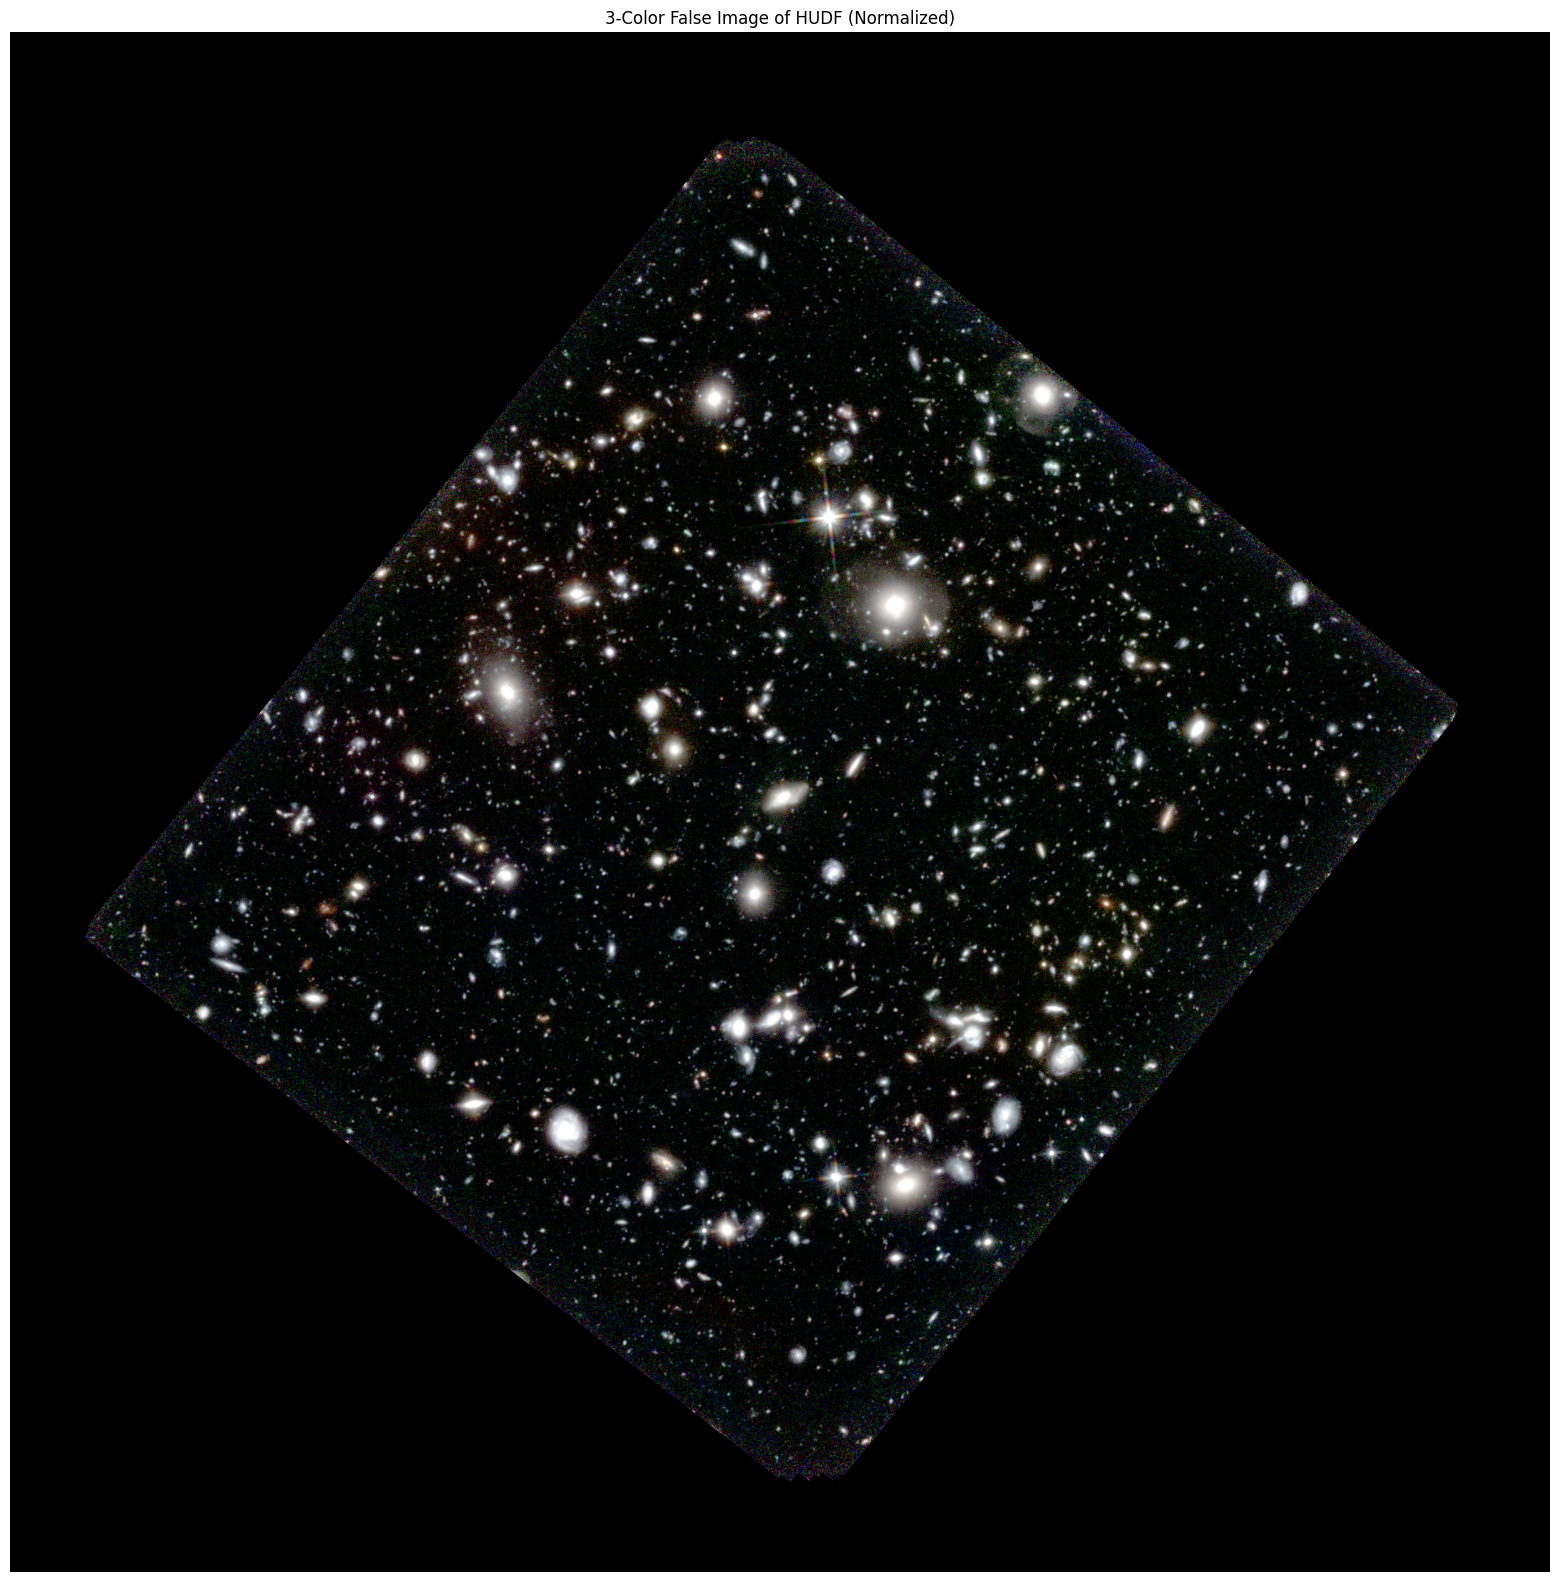

In [ ]:
def rescale_image(data):
    """Rescale image data for better visualization."""
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vpmin = 0.5 * m
    vpmax = 100 * m
    pdata_tmp[pdata_tmp < vpmin] = vpmin
    pdata_tmp[pdata_tmp > vpmax] = vpmax
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp

# Normalize data to the range [0, 1]
# Map pixel values of the images to the range [0, 1] for proper RGB combination.
def remap(data):
    """Normalize data to the range [0, 1]."""
    data_min = np.min(data)
    data_max = np.max(data)
    return (data - data_min) / (data_max - data_min)

f160w_rescaled = rescale_image(f160w_data)
f125w_rescaled = rescale_image(f125w_data)
f105w_rescaled = rescale_image(f105w_data)

# merge into RGB format
# Create a false-color RGB image by mapping f160w to red, f125w to green, and f105w to blue.
rgb_image = np.zeros((f160w_data.shape[0], f160w_data.shape[1], 3))
rgb_image[:, :, 0] = remap(f160w_rescaled)  # Red
rgb_image[:, :, 1] = remap(f125w_rescaled)  # Green
rgb_image[:, :, 2] = remap(f105w_rescaled)  # Blue

# Display the remapped 3-color image
# Display the final composite image, where different colors represent contributions
# from different wavelengths of light.
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(rgb_image)
plt.title("3-Color False Image of HUDF (Normalized)")
plt.savefig("3CFalseImgofHUDF.png")
plt.show()